In [1]:
import sys
import pdb
# sys.path.append("C:\\users\\mccar\\miniconda3\\lib\\site-packages")
import gymnasium as gym
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
import numpy as np
import matplotlib.pyplot as plt


C:\Users\mccar\AppData\Local\Programs\Python\Python311\Lib\site-packages\bettermdptools\algorithms\planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 0.54 seconds


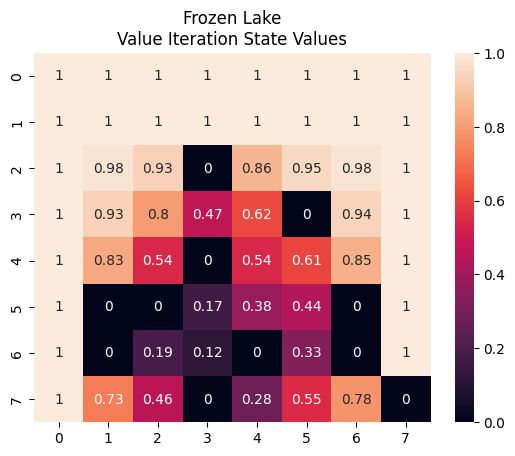

In [2]:
# make gym environment 
frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)

# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration()

#plot state values
size=(8,8)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

In [52]:
# Create the Frozen Lake 8x8 environment
env = gym.make('FrozenLake8x8-v1')
print_env = [[str(env.desc[i][j].decode()) for j in range(8)] for i in range(8)]


Episode 1 - Reward: 0.0, Steps: 67
Episode 2 - Reward: 0.0, Steps: 77
Episode 3 - Reward: 0.0, Steps: 26
Episode 4 - Reward: 0.0, Steps: 55
Episode 5 - Reward: 0.0, Steps: 46
Episode 6 - Reward: 0.0, Steps: 6
Episode 7 - Reward: 0.0, Steps: 26
Episode 8 - Reward: 0.0, Steps: 25
Episode 9 - Reward: 0.0, Steps: 56
Episode 10 - Reward: 0.0, Steps: 60
Episode 11 - Reward: 0.0, Steps: 79
Episode 12 - Reward: 0.0, Steps: 60
Episode 13 - Reward: 0.0, Steps: 33
Episode 14 - Reward: 0.0, Steps: 168
Episode 15 - Reward: 0.0, Steps: 27
Episode 16 - Reward: 0.0, Steps: 5
Episode 17 - Reward: 0.0, Steps: 9
Episode 18 - Reward: 0.0, Steps: 17
Episode 19 - Reward: 0.0, Steps: 59
Episode 20 - Reward: 0.0, Steps: 7
Episode 21 - Reward: 0.0, Steps: 9
Episode 22 - Reward: 0.0, Steps: 19
Episode 23 - Reward: 0.0, Steps: 15
Episode 24 - Reward: 0.0, Steps: 29
Episode 25 - Reward: 0.0, Steps: 29
Episode 26 - Reward: 0.0, Steps: 42
Episode 27 - Reward: 0.0, Steps: 28
Episode 28 - Reward: 0.0, Steps: 19
Episo

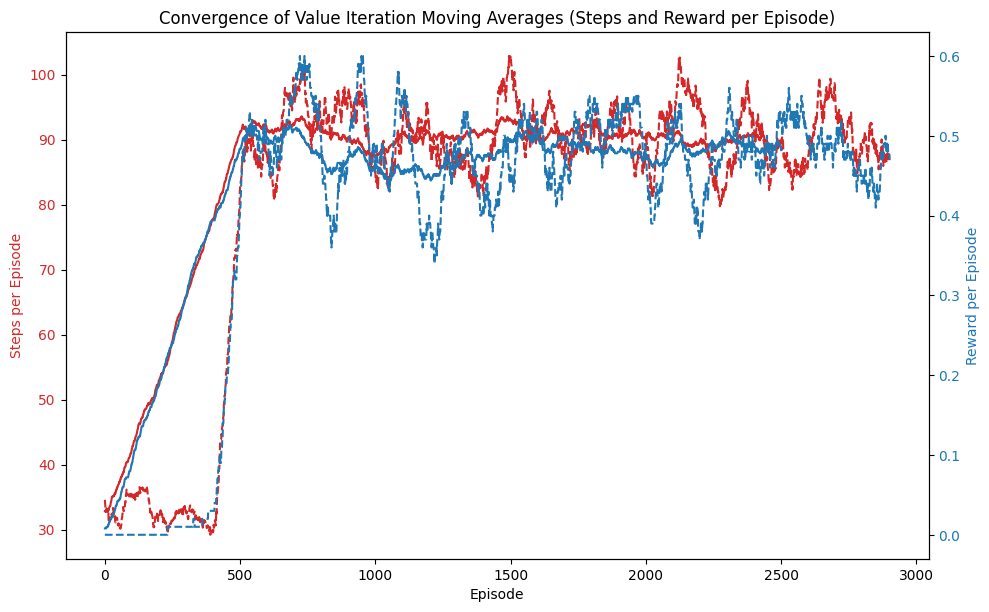

Found it in iteration:  331


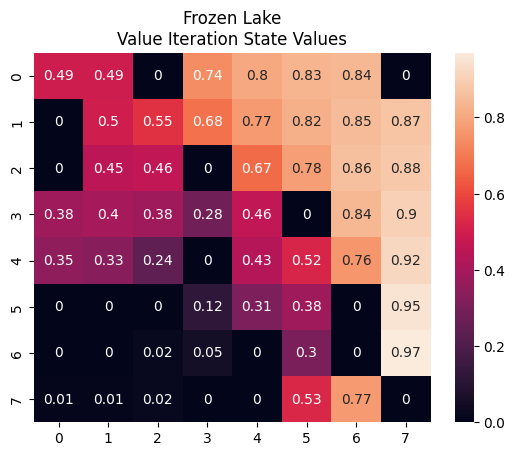

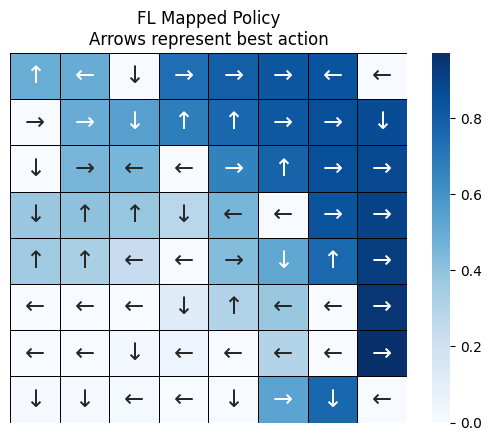

[['S' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'H' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'H' 'F' 'F']
 ['F' 'F' 'F' 'H' 'F' 'F' 'F' 'F']
 ['F' 'H' 'H' 'F' 'F' 'F' 'H' 'F']
 ['F' 'H' 'F' 'F' 'H' 'F' 'H' 'F']
 ['F' 'F' 'F' 'H' 'F' 'F' 'F' 'G']]


In [66]:
# Value Iteration
verbose = True
gamma = 0.999
# gamma = 1
epsilon = 1e-2

## Initialize the value function
V = np.zeros(env.observation_space.n)
rewards_by_iteration = []
steps_by_iteration = []
num_iterations = 0
rewards_by_episode = []
steps_by_episode = []
found_it = False
found_it_iter = 0

while True:
    state = env.reset()[0]
    delta = 0
    num_steps = 0
    total_reward = 0
    # For each episode, perform value iteration until convergence
    while True:
        # Increment the number of steps
        num_steps += 1
        # Choose the best action based on the current value function
        action_values = {}
        for action in range(env.action_space.n):
            action_values[action] = sum([prob * (reward + gamma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]])
        # pick a random move of the max states
        max_value = max(action_values.values())
        max_states = [state for state, value in action_values.items() if value == max_value]
        action = np.random.choice(max_states)
        # Take the action and observe the next state and reward
        next_state, reward, done, trunc, _ = env.step(action)
        if reward > 0:
            if not found_it:
                found_it = True
                found_it_iter = num_iterations
            print("Found IT!!!!")
        # print(num_steps, next_state, reward, done, trunc)
        # Update the total reward
        total_reward += reward
        # Update the value function
        V[state] = max(sum(prob * (reward + gamma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]) for action in range(env.action_space.n))
        # Check for convergence
        delta = max(delta, np.abs(total_reward - V[state]))
        if done or trunc:
            break
        # print(state)
        state = next_state
    # Increment the number of iterations
    num_iterations += 1
    rewards_by_episode.append(total_reward)
    steps_by_episode.append(num_steps)

    if verbose:
        print(f"Episode {num_iterations} - Reward: {total_reward}, Steps: {num_steps}")
    # Check for convergence
    if (delta < epsilon and num_iterations > 1000) or num_iterations > 3000:
        break

# moving avgs
reward_moving_avg_10 = np.convolve(rewards_by_episode, np.ones(10)/10, mode='valid')
reward_moving_avg_50 = np.convolve(rewards_by_episode, np.ones(50)/50, mode='valid')
reward_moving_avg_100 = np.convolve(rewards_by_episode, np.ones(100)/100, mode='valid')
reward_moving_avg_500 = np.convolve(rewards_by_episode, np.ones(500)/500, mode='valid')
reward_moving_avg_1000 = np.convolve(rewards_by_episode, np.ones(1000)/1000, mode='valid')
steps_moving_avg_10 = np.convolve(steps_by_episode, np.ones(10)/10, mode='valid')
steps_moving_avg_50 = np.convolve(steps_by_episode, np.ones(50)/50, mode='valid')
steps_moving_avg_100 = np.convolve(steps_by_episode, np.ones(100)/100, mode='valid')
steps_moving_avg_500 = np.convolve(steps_by_episode, np.ones(500)/500, mode='valid')
steps_moving_avg_1000 = np.convolve(steps_by_episode, np.ones(1000)/1000, mode='valid')


# Extract and return the optimal policy
policy = np.zeros(env.observation_space.n, dtype=int)
for state in range(env.observation_space.n):
    action_values = [sum(prob * (reward + gamma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]) for action in range(env.action_space.n)]
    policy[state] = np.argmax(action_values)

# Plot the convergence
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax1.set_xlabel('Episode')
ax1.set_ylabel('Steps per Episode', color=color)
# ax1.plot(steps_moving_avg_1000, label='Steps (MA-1000)', color=color)
ax1.plot(steps_moving_avg_500, label='Steps (MA-500)', color=color)
ax1.plot(steps_moving_avg_100, label='Steps (MA-100)', color=color, linestyle='dashed')
# ax1.plot(steps_moving_avg_50, label='Steps (MA-50)', color=color, linestyle='dashed')
# ax1.plot(steps_moving_avg_10, label='Steps (MA-10)', color=color, linestyle='dotted')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Reward per Episode', color=color)
# ax2.plot(reward_moving_avg_1000, label='Reward (MA-1000)', color=color)
ax2.plot(reward_moving_avg_500, label='Reward (MA-500)', color=color)
ax2.plot(reward_moving_avg_100, label='Reward (MA-100)', color=color, linestyle='dashed')
# ax2.plot(reward_moving_avg_50, label='Reward (MA-50)', color=color, linestyle='dashed')
# ax2.plot(reward_moving_avg_10, label='Reward (MA-10)', color=color, linestyle='dotted')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Convergence of Value Iteration Moving Averages (Steps and Reward per Episode)')
plt.show()

# Print the optimal policy
# print("Optimal Policy:")
# print(policy.reshape((8, 8)))
print("Found it in iteration: ", found_it_iter)

# plot state values
size=(8,8)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

# plot policy
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(8,8)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(policy, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

print(np.array(print_env))

Episode 1 - Reward: 0.0, Steps: 59
Episode 2 - Reward: 1.0, Steps: 54
Episode 3 - Reward: 1.0, Steps: 100
Episode 4 - Reward: 1.0, Steps: 159
Episode 5 - Reward: 1.0, Steps: 86
Episode 6 - Reward: 1.0, Steps: 192
Episode 7 - Reward: 0.0, Steps: 41
Episode 8 - Reward: 1.0, Steps: 80
Episode 9 - Reward: 0.0, Steps: 88
Episode 10 - Reward: 1.0, Steps: 136
Episode 11 - Reward: 1.0, Steps: 44
Episode 12 - Reward: 0.0, Steps: 200
Episode 13 - Reward: 1.0, Steps: 24
Episode 14 - Reward: 0.0, Steps: 35
Episode 15 - Reward: 1.0, Steps: 125
Episode 16 - Reward: 1.0, Steps: 96
Episode 17 - Reward: 1.0, Steps: 68
Episode 18 - Reward: 0.0, Steps: 48
Episode 19 - Reward: 0.0, Steps: 92
Episode 20 - Reward: 1.0, Steps: 52
Episode 21 - Reward: 0.0, Steps: 27
Episode 22 - Reward: 1.0, Steps: 70
Episode 23 - Reward: 1.0, Steps: 141
Episode 24 - Reward: 1.0, Steps: 47
Episode 25 - Reward: 1.0, Steps: 54
Episode 26 - Reward: 1.0, Steps: 36
Episode 27 - Reward: 1.0, Steps: 41
Episode 28 - Reward: 0.0, Step

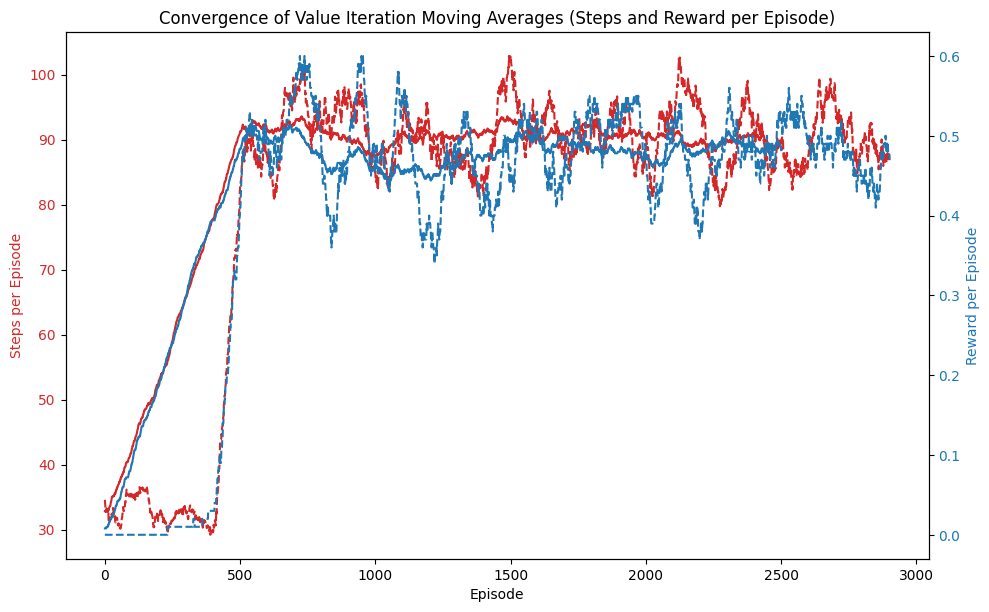

Found it in iteration:  331


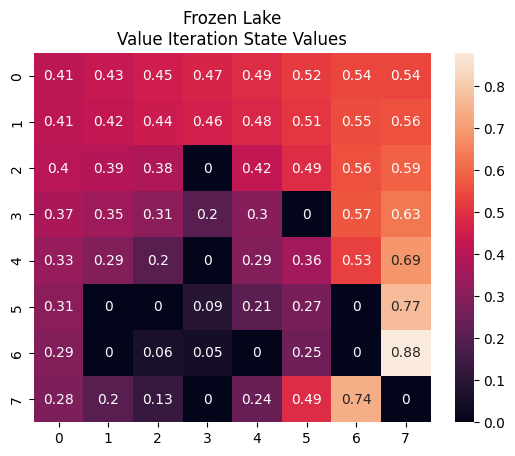

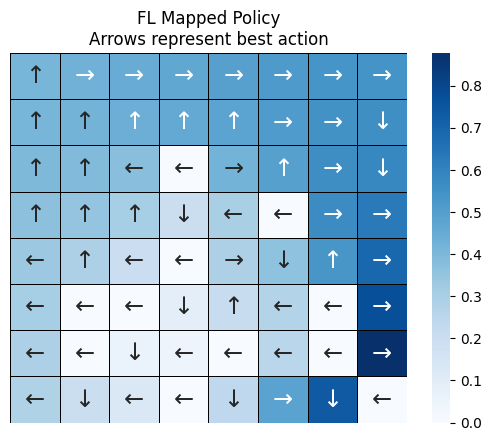

[['S' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'H' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'H' 'F' 'F']
 ['F' 'F' 'F' 'H' 'F' 'F' 'F' 'F']
 ['F' 'H' 'H' 'F' 'F' 'F' 'H' 'F']
 ['F' 'H' 'F' 'F' 'H' 'F' 'H' 'F']
 ['F' 'F' 'F' 'H' 'F' 'F' 'F' 'G']]
Optimal Policy:
[[3 2 2 2 2 2 2 2]
 [3 3 3 3 3 2 2 1]
 [3 3 0 0 2 3 2 1]
 [3 3 3 1 0 0 2 2]
 [0 3 0 0 2 1 3 2]
 [0 0 0 1 3 0 0 2]
 [0 0 1 0 0 0 0 2]
 [0 1 0 0 1 2 1 0]]

Value Function:
[[0.41463348 0.42719914 0.44614287 0.4683157  0.49243966 0.51656625
  0.53525811 0.5409719 ]
 [0.41167971 0.42120172 0.43749029 0.45838381 0.48323607 0.51352843
  0.54576477 0.55736547]
 [0.39674549 0.39383451 0.37549096 0.         0.42167468 0.49381606
  0.56120933 0.58585632]
 [0.36926598 0.35297694 0.30652683 0.20040138 0.30075022 0.
  0.5690135  0.62825677]
 [0.33265284 0.29136858 0.19730548 0.         0.28928833 0.36195006
  0.53481746 0.68969551]
 [0.30612142 0.         0.         0.08627537 0.2139312  0.27271272
  0.    

In [78]:
# Policy Iteration
verbose = True
found_it = False
found_it_iter = 0

def policy_evaluation(env, policy, gamma=0.99, epsilon=1e-6):
    V = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        for state in range(env.observation_space.n):
            v = V[state]
            action = policy[state]
            V[state] = sum(prob * (reward + gamma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action])
            delta = max(delta, np.abs(v - V[state]))
        if delta < epsilon:
            break
    return V

def policy_improvement(env, V, gamma=0.99):
    policy = np.zeros(env.observation_space.n, dtype=int)
    for state in range(env.observation_space.n):
        action_values = [sum(prob * (reward + gamma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]) for action in range(env.action_space.n)]
        policy[state] = np.argmax(action_values)
    return policy

def policy_iteration(env, max_iterations=100, gamma=0.99):
    rewards_per_episode = []
    steps_per_episode = []
    
    policy = np.random.randint(env.action_space.n, size=env.observation_space.n)
    for epi in range(max_iterations):
        V = policy_evaluation(env, policy, gamma)
        new_policy = policy_improvement(env, V, gamma)
        
        # Track rewards and steps per episode
        episode_reward = 0
        episode_steps = 0
        
        state = env.reset()[0]
        while True:
            action = new_policy[state]
            next_state, reward, done, trunc, _ = env.step(action)
            episode_reward += reward
            episode_steps += 1

            if reward > 0:
                if not found_it:
                    found_it = True
                    found_it_iter = epi
                print("Found IT!!!!")

            if done or trunc:
                rewards_per_episode.append(episode_reward)
                steps_per_episode.append(episode_steps)
                break
            state = next_state
        
        if verbose:
            print(f"Episode {epi+1} - Reward: {episode_reward}, Steps: {episode_steps}")
        
        if np.array_equal(new_policy, policy) and epi > 100:
            break
        policy = new_policy
    return policy, V, rewards_by_episode, steps_by_episode, found_it_iter


# Solve the Frozen Lake problem using Policy Iteration
policy, V, rewards_by_episode, steps_by_episode, found_it_iter = policy_iteration(env)


# moving avgs
reward_moving_avg_10 = np.convolve(rewards_by_episode, np.ones(10)/10, mode='valid')
reward_moving_avg_50 = np.convolve(rewards_by_episode, np.ones(50)/50, mode='valid')
reward_moving_avg_100 = np.convolve(rewards_by_episode, np.ones(100)/100, mode='valid')
reward_moving_avg_500 = np.convolve(rewards_by_episode, np.ones(500)/500, mode='valid')
reward_moving_avg_1000 = np.convolve(rewards_by_episode, np.ones(1000)/1000, mode='valid')
steps_moving_avg_10 = np.convolve(steps_by_episode, np.ones(10)/10, mode='valid')
steps_moving_avg_50 = np.convolve(steps_by_episode, np.ones(50)/50, mode='valid')
steps_moving_avg_100 = np.convolve(steps_by_episode, np.ones(100)/100, mode='valid')
steps_moving_avg_500 = np.convolve(steps_by_episode, np.ones(500)/500, mode='valid')
steps_moving_avg_1000 = np.convolve(steps_by_episode, np.ones(1000)/1000, mode='valid')


# # Extract and return the optimal policy
# policy = np.zeros(env.observation_space.n, dtype=int)
# for state in range(env.observation_space.n):
#     action_values = [sum(prob * (reward + gamma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]) for action in range(env.action_space.n)]
#     policy[state] = np.argmax(action_values)

# Plot the convergence
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax1.set_xlabel('Episode')
ax1.set_ylabel('Steps per Episode', color=color)
# ax1.plot(steps_moving_avg_1000, label='Steps (MA-1000)', color=color)
ax1.plot(steps_moving_avg_500, label='Steps (MA-500)', color=color)
ax1.plot(steps_moving_avg_100, label='Steps (MA-100)', color=color, linestyle='dashed')
# ax1.plot(steps_moving_avg_50, label='Steps (MA-50)', color=color, linestyle='dashed')
# ax1.plot(steps_moving_avg_10, label='Steps (MA-10)', color=color, linestyle='dotted')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Reward per Episode', color=color)
# ax2.plot(reward_moving_avg_1000, label='Reward (MA-1000)', color=color)
ax2.plot(reward_moving_avg_500, label='Reward (MA-500)', color=color)
ax2.plot(reward_moving_avg_100, label='Reward (MA-100)', color=color, linestyle='dashed')
# ax2.plot(reward_moving_avg_50, label='Reward (MA-50)', color=color, linestyle='dashed')
# ax2.plot(reward_moving_avg_10, label='Reward (MA-10)', color=color, linestyle='dotted')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Convergence of Value Iteration Moving Averages (Steps and Reward per Episode)')
plt.show()

# Print the optimal policy
# print("Optimal Policy:")
# print(policy.reshape((8, 8)))
print("Found it in iteration: ", found_it_iter)

# plot state values
size=(8,8)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

# plot policy
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(8,8)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(policy, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

print(np.array(print_env))


# Print the optimal policy
print("Optimal Policy:")
print(policy.reshape((8, 8)))

# Print the value function
print("\nValue Function:")
print(V.reshape((8, 8)))

In [90]:
# QLearning

def q_learning(env, num_episodes=100000, alpha=0.1, gamma=0.99, epsilon=0.1):
    # Initialize Q-table with zeros
    found_it = False
    found_it_iter = 0

    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_by_episode = []
    steps_by_episode = []

    for episode in range(num_episodes):
        state = env.reset()[0]
        total_reward = 0
        num_steps = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(Q[state])  # Exploit

            # Take action and observe next state and reward
            next_state, reward, done, trunc, info = env.step(action)

            if reward > 0:
                if not found_it:
                    found_it = True
                    found_it_iter = episode
                    print("Found IT!!!!")

            # Update Q-value using the Q-learning update rule
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            state = next_state
            total_reward += reward
            num_steps += 1

        print(f"Episode {episode + 1} - Reward: {total_reward}, Steps: {num_steps}")
        rewards_by_episode.append(total_reward)
        steps_by_episode.append(num_steps)

    return Q, rewards_by_episode, steps_by_episode, found_it_iter


# Run Q-Learning
Q, rewards_by_episode, steps_by_episode, found_it_iter = q_learning(env)

#  moving avgs
reward_moving_avg_10 = np.convolve(rewards_by_episode, np.ones(10)/10, mode='valid')
reward_moving_avg_50 = np.convolve(rewards_by_episode, np.ones(50)/50, mode='valid')
reward_moving_avg_100 = np.convolve(rewards_by_episode, np.ones(100)/100, mode='valid')
reward_moving_avg_500 = np.convolve(rewards_by_episode, np.ones(500)/500, mode='valid')
reward_moving_avg_1000 = np.convolve(rewards_by_episode, np.ones(1000)/1000, mode='valid')
steps_moving_avg_10 = np.convolve(steps_by_episode, np.ones(10)/10, mode='valid')
steps_moving_avg_50 = np.convolve(steps_by_episode, np.ones(50)/50, mode='valid')
steps_moving_avg_100 = np.convolve(steps_by_episode, np.ones(100)/100, mode='valid')
steps_moving_avg_500 = np.convolve(steps_by_episode, np.ones(500)/500, mode='valid')
steps_moving_avg_1000 = np.convolve(steps_by_episode, np.ones(1000)/1000, mode='valid')


# Extract and return the optimal policy
# policy = np.zeros(env.observation_space.n, dtype=int)
# for state in range(env.observation_space.n):
#     action_values = [sum(prob * (reward + gamma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]) for action in range(env.action_space.n)]
#     policy[state] = np.argmax(action_values)

# Plot the convergence
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax1.set_xlabel('Episode')
ax1.set_ylabel('Steps per Episode', color=color)
# ax1.plot(steps_moving_avg_1000, label='Steps (MA-1000)', color=color)
ax1.plot(steps_moving_avg_500, label='Steps (MA-500)', color=color)
ax1.plot(steps_moving_avg_100, label='Steps (MA-100)', color=color, linestyle='dashed')
# ax1.plot(steps_moving_avg_50, label='Steps (MA-50)', color=color, linestyle='dashed')
# ax1.plot(steps_moving_avg_10, label='Steps (MA-10)', color=color, linestyle='dotted')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Reward per Episode', color=color)
# ax2.plot(reward_moving_avg_1000, label='Reward (MA-1000)', color=color)
ax2.plot(reward_moving_avg_500, label='Reward (MA-500)', color=color)
ax2.plot(reward_moving_avg_100, label='Reward (MA-100)', color=color, linestyle='dashed')
# ax2.plot(reward_moving_avg_50, label='Reward (MA-50)', color=color, linestyle='dashed')
# ax2.plot(reward_moving_avg_10, label='Reward (MA-10)', color=color, linestyle='dotted')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Convergence of Value Iteration Moving Averages (Steps and Reward per Episode)')
plt.show()

# Print the optimal policy
# print("Optimal Policy:")
# print(policy.reshape((8, 8)))
print("Found it in iteration: ", found_it_iter)

# plot state values
# size=(8,8)
# Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

# plot policy
# fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
# fl_map_size=(8,8)
# title="FL Mapped Policy\nArrows represent best action"
# val_max, policy_map = Plots.get_policy_map(Q, V, fl_actions, fl_map_size)
# Plots.plot_policy(val_max, policy_map, fl_map_size, title)

# print(np.array(print_env))


# # Print the optimal policy
# print("Optimal Policy:")
# print(Q.reshape((8, 8)))

# # Print the value function
# print("\nValue Function:")
# print(V.reshape((8, 8)))

Episode 1 - Reward: 0.0, Steps: 9
Episode 2 - Reward: 0.0, Steps: 4
Episode 3 - Reward: 0.0, Steps: 15
Episode 4 - Reward: 0.0, Steps: 2
Episode 5 - Reward: 0.0, Steps: 9
Episode 6 - Reward: 0.0, Steps: 10
Episode 7 - Reward: 0.0, Steps: 7
Episode 8 - Reward: 0.0, Steps: 20
Episode 9 - Reward: 0.0, Steps: 19
Episode 10 - Reward: 0.0, Steps: 7
Episode 11 - Reward: 0.0, Steps: 7
Episode 12 - Reward: 0.0, Steps: 6
Episode 13 - Reward: 0.0, Steps: 6
Episode 14 - Reward: 0.0, Steps: 31
Episode 15 - Reward: 0.0, Steps: 12
Episode 16 - Reward: 0.0, Steps: 32
Episode 17 - Reward: 0.0, Steps: 14
Episode 18 - Reward: 0.0, Steps: 21
Episode 19 - Reward: 0.0, Steps: 8
Episode 20 - Reward: 0.0, Steps: 8
Episode 21 - Reward: 0.0, Steps: 25
Episode 22 - Reward: 0.0, Steps: 14
Episode 23 - Reward: 0.0, Steps: 42
Episode 24 - Reward: 0.0, Steps: 3
Episode 25 - Reward: 0.0, Steps: 7
Episode 26 - Reward: 0.0, Steps: 6
Episode 27 - Reward: 0.0, Steps: 4
Episode 28 - Reward: 0.0, Steps: 6
Episode 29 - Rewa